In [2]:
import histogram_manager as hm
import ROOT
import utils
import toml
import pandas as pd 
import numpy as np

%jsroot on

Welcome to JupyROOT 6.28/00


In [4]:
hists = hm.HistogramManager("../output/stage1_output.root")
# hists.plot("hEgam_d1").Draw()

hists.write("test.root")

# ROOT.gROOT.GetListOfCanvases().Draw()



In [5]:
# c = hists.plot("hEn_beamcorr_pucorr",(8,16))
# # c.Draw()

# for canvas in c:
#     canvas.Draw()

# ROOT.gROOT.GetListOfCanvases().Draw()

In [164]:
# det_map_dict = {
#     "position": [-1,1,7,3,-1,-1,6,5,-1,13,10,11,-1,9,-1,15,-1,18,17,19,20,-1,-1,-1,-1,28,25,-1,-1,-1,-1,-1],
#     "active": [False,True,True,True,False,False,True,True,False,True,True,True,False,True,False,True,
#                False,True,True,True,False,False,False,False,False,True,False,True,False,False,False,False],
#     "type": ['shot', 'up', 'up', 'up', 'empty', 'empty', 'up', 'up', 'shot', 'down', 'down', 'down', 'empty', 
#              'down', 'empty', 'down', 'shot', 'coaxial', 'coaxial', 'coaxial', 'coaxial', 'empty', 'empty', 
#              'empty', 'shot', 'coaxial', 'coaxial', 'empty', 'up', 'empty', 'empty', 'empty']
# }

# df = pd.DataFrame(det_map_dict)
# df.index.name = 'ch'
# df

In [165]:
config1= utils.load_config("../scripts/det_map1.toml")
data1 = config1["det"]
# data

df1 = pd.DataFrame(data1).T
# df1.index.name = 'channel'
df1.index = df1.channel
del df1["channel"]
df1

config2= utils.load_config("../scripts/det_map2.toml")
data2 = config2["det"]
# data

df2 = pd.DataFrame(data2).T
# df1.index.name = 'channel'
df2.index = df2.channel
del df2["channel"]
df2


# dict = df1.to_dict(orient="list")
# with open('test.toml','w') as f:
#     toml.dump(dict,f)


,position,angle,active,type
channel,,,,
0,NaN,NaN,False,shot
1,1,71,True,up
2,7,90,True,up
3,3,109,True,up
4,NaN,NaN,False,empty
5,NaN,NaN,False,empty
6,6,71,True,up
7,5,90,True,up
8,NaN,NaN,False,shot


In [177]:
# type(list(df1.position)[1])
# list(df1.position)

# df1.active.to_numpy()


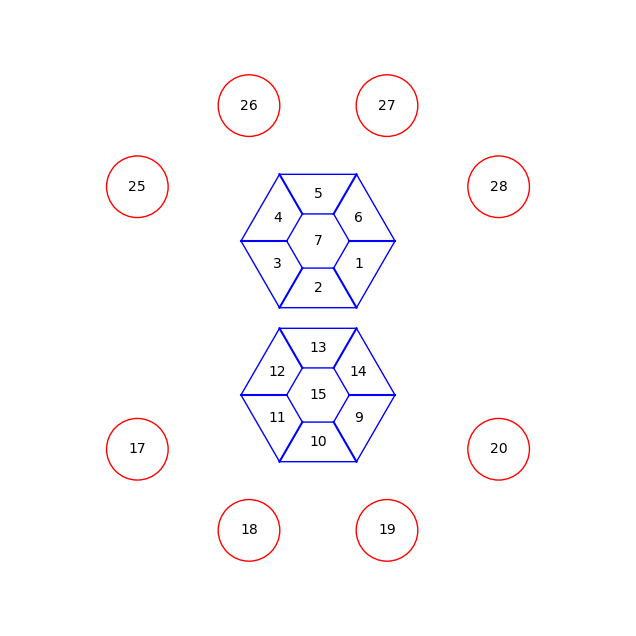

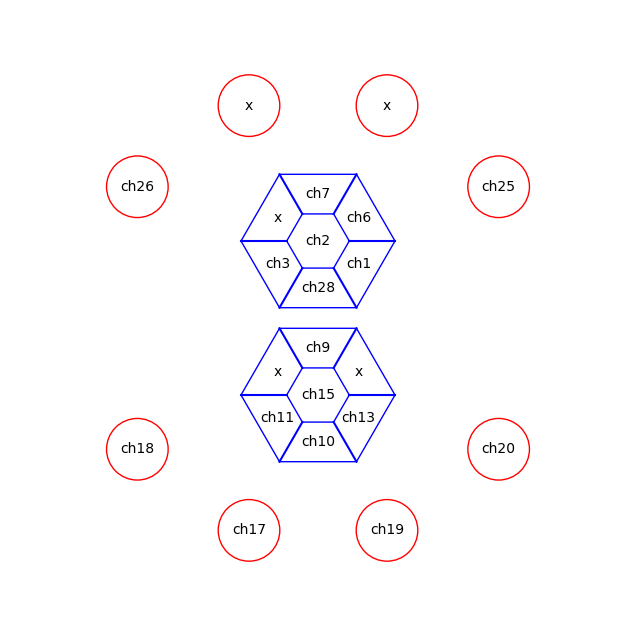

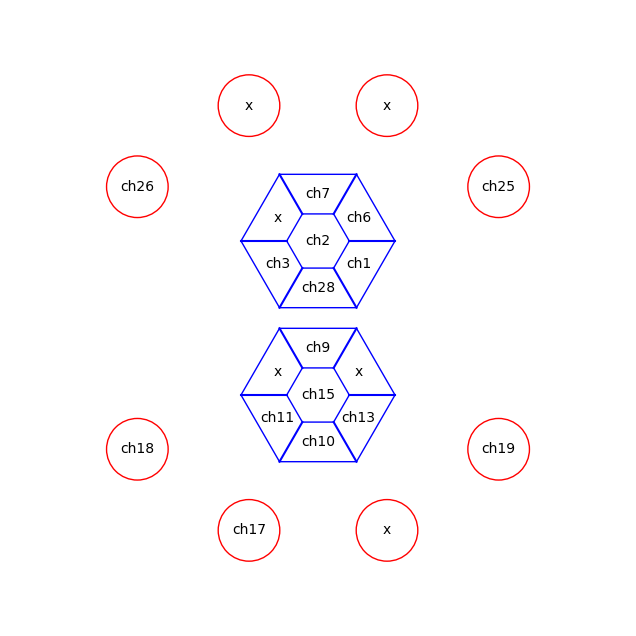

In [168]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def plot_detectors(channels=None):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    def hexagon_vertices(ctr, rad):
        return [(ctr[0] + rad * np.cos(angle), ctr[1] + rad * np.sin(angle)) for angle in np.linspace(0, 2*np.pi, 6, endpoint=False)]

    def centroid(vertices):
        x_coords = [vert[0] for vert in vertices]
        y_coords = [vert[1] for vert in vertices]
        return sum(x_coords) / len(vertices), sum(y_coords) / len(vertices)

    def get_label(position):
        if channels is None:
            return str(position)
        else:
            try:
                return f"ch{channels.index(position)}"
            except ValueError:
                return "x"

    def plot_hexagon_cluster(center=(0, 0), s=1, start_position=1):
        outer_hex_verts = hexagon_vertices(center, s)
        outer_hex = patches.Polygon(outer_hex_verts, closed=True, edgecolor='blue', fill=False)
        ax.add_patch(outer_hex)

        r = np.sqrt((2 * s**2) / (7 * np.sqrt(3)))
        inner_hex_verts = hexagon_vertices(center, r)
        inner_hex = patches.Polygon(inner_hex_verts, closed=True, edgecolor='blue', fill=False)
        ax.add_patch(inner_hex)

        ax.text(center[0], center[1], get_label(start_position + 6), ha='center', va='center')
        indices = [5, 4, 3, 2, 1, 0]
        for i, index in enumerate(indices):
            inner_v, outer_v = inner_hex_verts[index], outer_hex_verts[index]
            ax.plot([inner_v[0], outer_v[0]], [inner_v[1], outer_v[1]], color='blue')
            next_outer_v = outer_hex_verts[(index+1) % 6]
            next_inner_v = inner_hex_verts[(index+1) % 6]
            trap_center = centroid([inner_v, next_inner_v, next_outer_v, outer_v])
            ax.text(trap_center[0], trap_center[1], get_label(start_position + i), ha='center', va='center')

    def plot_circular_detectors(center=(0,0), radius=2.9, angles=[-144, -108, -72, -36, 36, 72, 108, 144], circle_radius=0.4, start_position=17):
        custom_order = [17, 18, 19, 20, 28, 27, 26, 25]
        for i, angle in enumerate(angles):
            x = center[0] + radius * np.cos(np.radians(angle))
            y = center[1] + radius * np.sin(np.radians(angle))
            circle = patches.Circle((x, y), circle_radius, edgecolor='red', fill=False)
            ax.add_patch(circle)
            ax.text(x, y, get_label(custom_order[i]), ha='center', va='center')

    plot_hexagon_cluster((0, 1), start_position=1)
    plot_hexagon_cluster((0, -1), start_position=9)
    plot_circular_detectors(start_position=17)

    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.axis('off')
    plt.show()


plot_detectors()
plot_detectors(list(df1.position))
plot_detectors(list(df2.position))


In [15]:
# # infile = ROOT.TFile.Open('../data/raw0088_000.root')

# df = ROOT.RDataFrame('rawTree','../data/rawroot_run_0014_000.root')
# # df.Display().Print()
# # df = df.Alias("PulseHeight","pulseHeight")
# # df.Describe().Print()
# # df.Display().Print()
# a = df.Mean("tof")

# print(a.GetValue())

21775200.173356578
